## import library

- tensorflow 2.x (tf.keras)
- pandas
- numpy
- matplotlib

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [3]:
import os

working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print('current dir = ', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


## File Upload From Google Drive Working Directory

- titanic_train.csv
- titanic_test.csv

In [4]:
try:
  
  original_train_df = pd.read_csv('./titanic_train.csv')
  original_test_df = pd.read_csv('./titanic_test.csv')

  print("original_train_df.shape = ", original_train_df.shape, ", original_test_df.shape = ", original_test_df.shape)

except Exception as err:
  
  print(str(err))

original_train_df.shape =  (891, 12) , original_test_df.shape =  (418, 11)


In [5]:
original_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
original_test_df.head(),

(   PassengerId  Pclass  ... Cabin Embarked
 0          892       3  ...   NaN        Q
 1          893       3  ...   NaN        S
 2          894       2  ...   NaN        Q
 3          895       3  ...   NaN        S
 4          896       3  ...   NaN        S
 
 [5 rows x 11 columns],)

## CSV File Preprocessing

- Using row
> [ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- transforming non-float data to float data ('Sex' row)
- processing missing data
> - 'Age' row -> mean value
> - 'Fare' row -> median value



In [7]:
print("[original_train_df.isnull().sum()]\n", original_train_df.isnull().sum())
print("\n\n[original_test_df.isnull().sum()]\n", original_test_df.isnull().sum())

[original_train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[original_test_df.isnull().sum()]
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_df = original_train_df.copy()[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
test_df = original_test_df.copy()[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [10]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


[test_df.isnull().sum()]
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [11]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [12]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [13]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [14]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [15]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64 



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.50000,0,0,7.8292
1,3,1,47.00000,1,0,7.0000
2,2,0,62.00000,0,0,9.6875
3,3,0,27.00000,0,0,8.6625
4,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500


In [16]:
train_data = np.array(train_df) # 학습 데이터프레임

train_xdata = train_data[ :  , 1: ]
train_tdata = train_data[ :  , [0]]

test_data = np.array(test_df) # 예측 데이터프레임

print('train_data.shape = ', train_data.shape)
print('train_xdata.shape = ', train_xdata.shape, ', train_tdata.shape = ', train_tdata.shape)
print('test_data.shape = ', test_data.shape)

train_data.shape =  (891, 7)
train_xdata.shape =  (891, 6) , train_tdata.shape =  (891, 1)
test_data.shape =  (418, 6)


## Get Dataframe

- function of getting dataframe before encoding csv

In [17]:
def get_dataframe(result):
  if result.ndim == 2:
    result = result.reshape(-1) # changing data shape to 1 dim in order to get df

  df = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': result
})

  df = df.astype(int)

  return df

## Beta Model

In [18]:
MLM1_1 = Sequential()

MLM1_1.add(Dense(train_tdata.shape[1],
                input_shape=(train_xdata.shape[1], ), activation='sigmoid'))

In [19]:
MLM1_1.compile(optimizer=SGD(lr=1e-5),
               loss='binary_crossentropy', metrics=['accuracy'])

MLM1_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = MLM1_1.fit(train_xdata, train_tdata, epochs=2000, validation_split=0.1, verbose=2)

Epoch 1/2000
26/26 - 0s - loss: 14.8842 - accuracy: 0.3196 - val_loss: 12.7826 - val_accuracy: 0.3222
Epoch 2/2000
26/26 - 0s - loss: 14.8198 - accuracy: 0.3196 - val_loss: 12.7259 - val_accuracy: 0.3222
Epoch 3/2000
26/26 - 0s - loss: 14.7586 - accuracy: 0.3196 - val_loss: 12.6627 - val_accuracy: 0.3222
Epoch 4/2000
26/26 - 0s - loss: 14.6926 - accuracy: 0.3196 - val_loss: 12.6004 - val_accuracy: 0.3222
Epoch 5/2000
26/26 - 0s - loss: 14.6274 - accuracy: 0.3196 - val_loss: 12.5439 - val_accuracy: 0.3222
Epoch 6/2000
26/26 - 0s - loss: 14.5670 - accuracy: 0.3196 - val_loss: 12.4831 - val_accuracy: 0.3222
Epoch 7/2000
26/26 - 0s - loss: 14.5034 - accuracy: 0.3171 - val_loss: 12.4269 - val_accuracy: 0.3333
Epoch 8/2000
26/26 - 0s - loss: 14.4430 - accuracy: 0.3171 - val_loss: 12.3661 - val_accuracy: 0.3333
Epoch 9/2000
26/26 - 0s - loss: 14.3787 - accuracy: 0.3171 - val_loss: 12.3065 - val_accuracy: 0.3333
Epoch 10/2000
26/26 - 0s - loss: 14.3156 - accuracy: 0.3171 - val_loss: 12.2505 - 

In [21]:
print('type(hist) = ', type(hist))
print('type(hist.history) = ', type(hist.history))
print()

hist.history.keys()

type(hist) =  <class 'tensorflow.python.keras.callbacks.History'>
type(hist.history) =  <class 'dict'>



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
MLM1_1.evaluate(train_xdata, train_tdata)

28/28 [==============================] - 0s 794us/step - loss: 0.7768 - accuracy: 0.6150


[0.776807427406311, 0.6150392889976501]

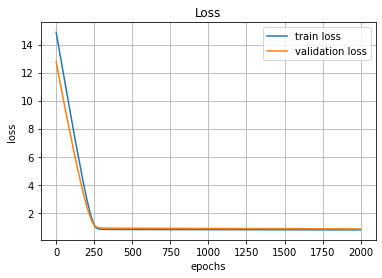

In [23]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

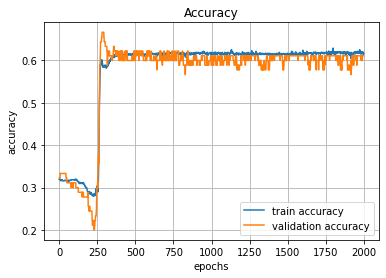

In [24]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [25]:
real_predict_list = MLM1_1.predict(train_xdata)

print('type(real_predict_list) = ', type(real_predict_list))
print('real_predict_list sample = ', real_predict_list[:10])
print()

logical_predict_list = (real_predict_list > 0.5)

print('type(logical_predict_list) = ', type(logical_predict_list))
print('logical_predict_list sample = ', logical_predict_list[:10])
print()

logical_predict_list = logical_predict_list.flatten().astype('float32')

print('type(logical_predict_list) = ', type(logical_predict_list))
print("logical_predict_list sample = ", logical_predict_list[:10])
print()

label_list = train_tdata.flatten()

print('logical_predict_list.shape = ', logical_predict_list.shape)
print('label_list.shape = ', label_list.shape)

index_label_prediction_list = [[idx, label_list[idx], prediction] for idx, prediction in enumerate(logical_predict_list) if label_list[idx] != prediction]

print('\n', index_label_prediction_list)

accuracy = 1 - (len(index_label_prediction_list) / len(label_list))

print('\naccuracy = ', accuracy)

type(real_predict_list) =  <class 'numpy.ndarray'>
real_predict_list sample =  [[0.46719307]
 [0.5191364 ]
 [0.2115809 ]
 [0.49906132]
 [0.23434967]
 [0.2544231 ]
 [0.29283923]
 [0.9097541 ]
 [0.34634712]
 [0.51638436]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [[False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]]

type(logical_predict_list) =  <class 'numpy.ndarray'>
logical_predict_list sample =  [0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]

logical_predict_list.shape =  (891,)
label_list.shape =  (891,)

 [[2, 1.0, 0.0], [3, 1.0, 0.0], [7, 0.0, 1.0], [8, 1.0, 0.0], [11, 1.0, 0.0], [13, 0.0, 1.0], [15, 1.0, 0.0], [16, 0.0, 1.0], [17, 1.0, 0.0], [19, 1.0, 0.0], [21, 1.0, 0.0], [22, 1.0, 0.0], [23, 1.0, 0.0], [24, 0.0, 1.0], [27, 0.0, 1.0], [28, 1.0, 0.0], [32, 1.0, 0.0], [34, 0.0, 1.0], [35, 0.0, 1.0], [36, 1.0, 0.0], [38, 0.0, 1.0], [39, 1.0, 0.0], [44, 1.0, 0.0], [47, 1.0, 0.0], [48, 0.0, 1.0], [50, 0.0, 1.0], [52, 